In [1]:
import gandula
from tqdm.auto import tqdm
import os
import sys

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\jllgo\OneDrive\Documentos\UFMG\MSc & MSI 2\MatchSegmentation\notebooks


In [16]:
current_dir = os.getcwd()
# Assume the project root is two levels up from the current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [18]:
from src.data.loader import FramesLoader
from src.data.dataset import IntervalDataset

In [19]:
DATA_PATH = '../data/raw/PL-22-23'
output_path = "../data/intermediate/PL-22-23"

In [20]:
games = os.listdir(DATA_PATH)
game_ids = [game.split('.')[0] for game in games]

In [21]:
frames_loader = FramesLoader(game_ids[:5], DATA_PATH)
frames_loader.load(output_path)
len(frames_loader)

Loading frames:   0%|          | 0/5 [00:00<?, ?it/s]

5

In [22]:
frame = frames_loader[0]

In [23]:
frame[0]['home_has_possession'].unique()

array([1., 0.])

In [24]:
frame[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17893 entries, 0 to 17892
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17893 non-null  int64  
 1   frame_id                17893 non-null  int64  
 2   period                  17893 non-null  int64  
 3   elapsed_seconds         17893 non-null  float64
 4   home_has_possession     17893 non-null  float64
 5   event_id                7822 non-null   float64
 6   event_type              17893 non-null  object 
 7   event_setpiece_type     17893 non-null  object 
 8   event_player_id         6592 non-null   float64
 9   event_team_id           6593 non-null   float64
 10  event_start_frame       6849 non-null   float64
 11  event_end_frame         6849 non-null   float64
 12  possession_id           1299 non-null   float64
 13  possession_type         17893 non-null  object 
 14  possession_start_frame  378 non-null  

In [25]:
frame[1]

,elapsed_seconds,frame_id,match_id,period,shirt,x,y,team,ball_x,ball_y,...,ball_vz,ball_speed,ball_ax,ball_ay,ball_az,vx,vy,ax,ay,speed
0,0.000000,1594,4436,1,1,37.992,2.652,away,-2.43,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.199720,1600,4436,1,1,37.971,2.714,away,-5.24,0.83,...,0.000000,34.766179,-1041.894311,8.981848,0.000000,0.000000,0.000000,-0.898212,-9.880328,0.000000
2,0.399920,1606,4436,1,1,38.016,2.722,away,-8.95,0.39,...,0.000000,36.859000,-1086.868694,-197.612490,0.000000,0.000000,0.000000,-52.096277,-12.574963,0.000000
3,0.600120,1612,4436,1,1,38.197,2.791,away,-12.14,0.44,...,-0.599413,31.176658,-934.168133,-8.982386,-17.964772,0.000000,0.000000,-38.623102,-17.066022,0.000000
4,0.800321,1618,4436,1,1,38.344,2.757,away,-15.01,0.30,...,0.000000,28.736581,-853.275513,-116.764018,0.000000,0.000000,0.000000,-58.382009,6.287293,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369859,1752.519308,139090,4436,2,28,-9.612,18.026,home,23.08,33.19,...,0.000000,7.347170,-215.564340,44.909238,0.000000,1.948032,-1.078910,58.382009,-32.334651,2.226854
369860,1752.719508,139096,4436,2,28,-9.466,18.086,home,23.55,32.97,...,1.198789,11.060414,314.364663,-98.800323,35.927390,2.067911,1.048941,61.974748,31.436466,2.318735
369861,1752.919708,139102,4436,2,28,-9.319,18.194,home,24.37,33.11,...,1.798184,7.198976,188.618798,89.818475,53.891085,0.539455,-2.847124,16.167326,-85.327551,2.897780
369862,1753.119908,139108,4436,2,28,-9.084,18.391,home,24.06,32.62,...,0.599413,10.159115,-170.665332,-251.506805,17.964772,2.637415,9.860337,79.044996,295.520496,10.206968


In [26]:
dataset = GraphStream(frame[0], frame[1])

Processing data: 100%|██████████| 16688/16688 [00:30<00:00, 550.74it/s]


In [27]:
dataset.data_list[15].x[21]

tensor([-6.1880,  6.6640,  0.0000,  0.0000,  1.0000])

tensor([[-27.1250,  -4.9390,   0.0000,   0.0000,   1.0000],
        [  9.6910,   3.0660,   0.0000,   0.0000,   1.0000],
        [ 21.7210, -32.8880,   0.0000,   0.0000,   1.0000],
        [ 19.2190, -19.3600,   0.0000,   0.0000,   1.0000],
        [  3.8760,  -9.9290,   0.0000,   0.0000,   1.0000],
        [ 29.7900, -22.8110,   0.0000,   0.0000,   1.0000],
        [ 26.1500,  -0.7200,   0.0000,   0.0000,   1.0000],
        [ 21.3760, -29.8770,   0.0000,   0.0000,   1.0000],
        [ 30.7060, -14.3080,   0.0000,   0.0000,   1.0000],
        [ 30.8590, -31.0720,   0.0000,   0.0000,   1.0000],
        [ 24.2790,  -5.7110,   0.0000,   0.0000,   1.0000],
        [ 34.5600, -24.6910,   0.0000,   0.0000,   0.0000],
        [ 29.9140, -18.3420,   0.0000,   0.0000,   0.0000],
        [ 37.0070, -25.3660,   0.0000,   0.0000,   0.0000],
        [ 19.0540, -16.5800,   0.0000,   0.0000,   0.0000],
        [ 31.9060, -25.1060,   0.0000,   0.0000,   0.0000],
        [ 44.4670,  -4.5920,   0.0000,  

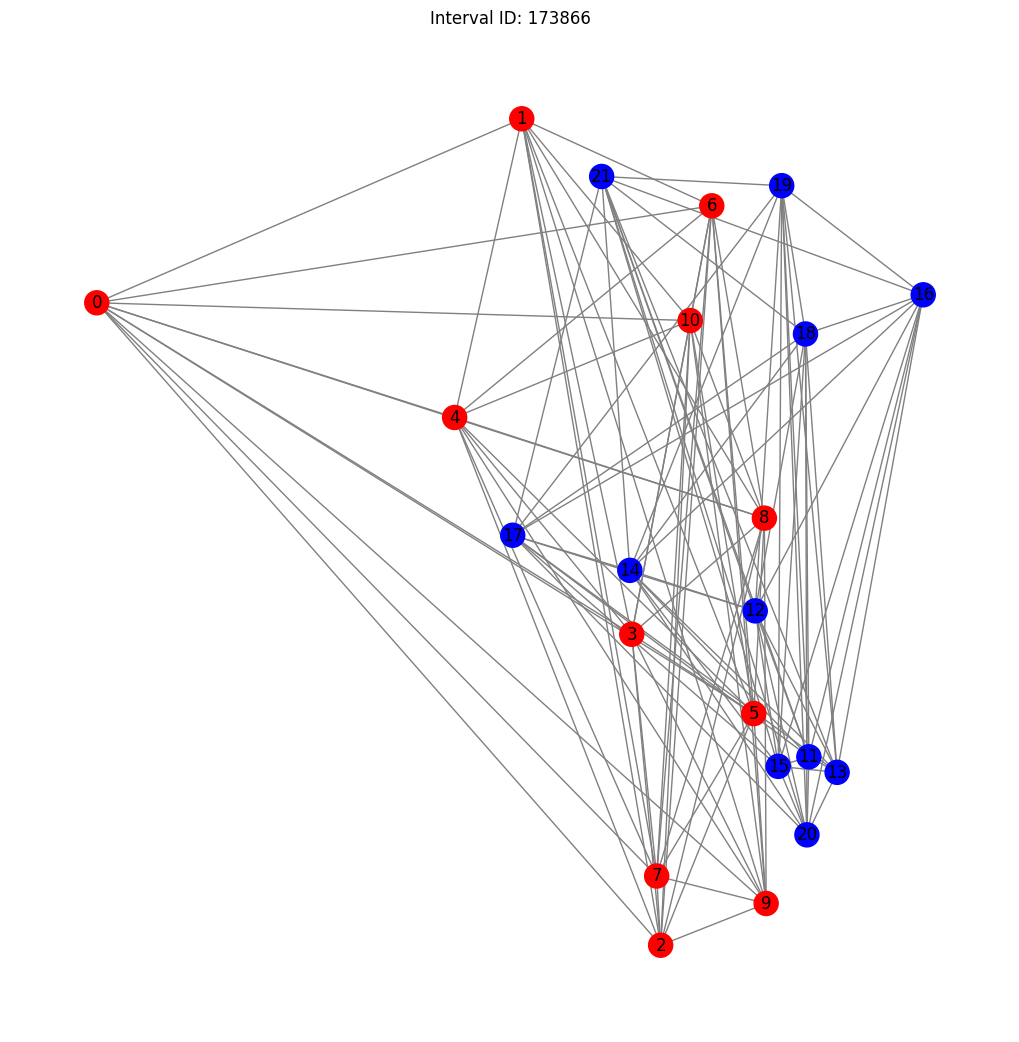

In [28]:
dataset.view(-3)